In [89]:
import os
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
# 프레임 repr에서 자동 줄바꿈 비활성화
pd.set_option('display.expand_frame_repr', False)
# 출력 폭 제한 해제
pd.set_option('display.width', None)

In [90]:
file_path = '/home/hwkang/dev-TSB-AD/TSB-AD/analyses/metadata_timeseries.csv'

In [91]:
df = pd.read_csv(file_path)

In [92]:
# Curated 열의 총합
curated_sum = df['Curated'].sum()
print(f"Total number of curated samples: {curated_sum}")

Total number of curated samples: 200


In [93]:
def sort_by_column(df, column_name, descending=True):
    """
    Sort the DataFrame by a specified column.
    
    :param df: DataFrame to sort
    :param column_name: Column name to sort by
    :param descending: Sort order (default is descending)
    :return: Sorted DataFrame
    """
    return df.sort_values(by=column_name, ascending=not descending)

In [94]:
# df의 3번째 열부터 마지막 열까지 이름 추출
column_names = df.columns[2:]
for column_name in column_names:

    # 열 이름을 기준으로 DataFrame 정렬
    sorted_df = sort_by_column(df, column_name)

    # 정렬된 DataFrame의 상위 10개 행 출력
    print(f"Top 10 rows sorted by {column_name}:\n{sorted_df}\n")

Top 10 rows sorted by AvgDim:
          Name  Curated  AvgDim   AvgTSLen  AvgNumAnomaly  AvgAnomalyLen  AnomalyRatio  Category
4          OPP        8     248   17426.75            1.4          394.3           4.1         0
6         SWaT        2      59  207457.50           16.5         1093.6          12.7         0
9          MSL       16      55    3119.40            1.3          111.7           5.1         0
5          SMD       22      38   25466.40            8.9          112.8           3.8         0
10  CreditCard        1      29  284807.00          465.0            1.1           0.2         1
8         SMAP       27      25    7855.90            1.3          196.3           2.9         0
7          PSM        1      25  217624.00           72.0          338.6          11.2         1
2     Exathlon       27      21   60878.40            4.3         1373.3           9.8         0
0          GHL       25      19  199001.00            2.2         1035.2           1.1         0


In [97]:
# sort by AvgAnomalyLen and print all rows
sorted_df = sort_by_column(df, 'AvgAnomalyLen')
print(f"All rows sorted by AvgAnomalyLen:\n{sorted_df}\n")

All rows sorted by AvgAnomalyLen:
          Name  Curated    AvgDim  AvgTSLen  AvgNumAnomaly  AvgAnomalyLen  AnomalyRatio  Category
12       MITDB       13  0.008065  1.000000       0.019284       1.000000      0.174194       0.0
2     Exathlon       27  0.084677  0.181103       0.005455       0.743611      0.632258       0.0
6         SWaT        2  0.237903  0.617151       0.020934       0.592159      0.819355       0.0
0          GHL       25  0.076613  0.591994       0.002791       0.560537      0.070968       0.0
15      CATSv2        6  0.068548  0.713959       0.014590       0.439463      0.238710       0.0
4          OPP        8  1.000000  0.051842       0.001776       0.213504      0.264516       0.0
1      Daphnet        1  0.036290  0.115346       0.007612       0.208090      0.380645       0.0
7          PSM        1  0.100806  0.647394       0.091347       0.183344      0.722581       1.0
13        SVDB       31  0.008065  0.616154       0.086653       0.145224      0.309

In [98]:
# sort by AnomalyRatio and print all rows
sorted_df = sort_by_column(df, 'AnomalyRatio')
print(f"All rows sorted by AnomalyRatio:\n{sorted_df}\n")

All rows sorted by AnomalyRatio:
          Name  Curated    AvgDim  AvgTSLen  AvgNumAnomaly  AvgAnomalyLen  AnomalyRatio  Category
14        LTDB        5  0.008065  0.297483       0.133215       0.072775      1.000000       0.0
6         SWaT        2  0.237903  0.617151       0.020934       0.592159      0.819355       0.0
7          PSM        1  0.100806  0.647394       0.091347       0.183344      0.722581       1.0
2     Exathlon       27  0.084677  0.181103       0.005455       0.743611      0.632258       0.0
16         TAO       13  0.012097  0.029748       1.000000       0.000596      0.561290       1.0
1      Daphnet        1  0.036290  0.115346       0.007612       0.208090      0.380645       0.0
9          MSL       16  0.221774  0.009280       0.001649       0.060483      0.329032       0.0
13        SVDB       31  0.008065  0.616154       0.086653       0.145224      0.309677       0.0
4          OPP        8  1.000000  0.051842       0.001776       0.213504      0.2645

In [95]:
def plot_data(df):
    names = df['Name'].tolist()
    print(names)
    column_names = df.columns[2:]  # 3번째 열부터 마지막 열까지 선택
    num_datasets = len(names)
    num_columns = len(column_names)

    # normalize the data on each column
    # 각 열의 최대값으로 나누어 정규화
    for column_name in column_names:
        df[column_name] = df[column_name] / df[column_name].max()

    # 각 열의 값을 순위로 변환시킨 rank_df 생성
    rank_df = df[column_names].rank(ascending=False, method='min')
    # rank_df에 'Name' 열 추가
    rank_df.insert(0, 'Name', df['Name'])
    rank_df.insert(1, 'Curated', df['Curated'])
    
    # 3) 정규화값(소수점 둘째 자리)과 순위를 "( )" 형태로 합치기
    combined_df = df.copy()
    for col in column_names:
        combined_df[col] = (
            df[col].map('{:.2f}'.format)
             + '('
             + rank_df[col].astype(int).map(str)
             + ')'
        )
    # Name, Curated 컬럼도 앞쪽에 위치시키려면
    combined_df.insert(0, 'Curated', combined_df.pop('Curated'))
    combined_df.insert(0, 'Name', combined_df.pop('Name'))
    
    plt.figure(figsize=(16, 10))
    colors = plt.get_cmap('tab20', num_datasets)

    for idx, name in enumerate(names):
        data = df.iloc[idx, 2:].values
        rank_data = rank_df.iloc[idx, 2:].values
        
        # 각 이름에 대한 선 그래프 그리기
        if name == 'GHL':
            plt.plot(range(num_columns), data, marker='*', linestyle='--', label=name, color=colors(idx))
        else:
            plt.plot(range(num_columns), data, marker='o', label=name, color=colors(idx))

        # data 값에 대한 순위를 plot 좌측 중간에 표시
        for col_idx, rank in enumerate(rank_data):
            plt.text(col_idx, data[col_idx], f'{int(rank)}', fontsize=8, ha='left', va='bottom')
        
    plt.xticks(range(num_columns), column_names)
    plt.xlabel('Columns')
    plt.ylabel('Rank')
    plt.title('Ranked Data by Name')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')
    plt.show()

    return combined_df

['GHL', 'Daphnet', 'Exathlon', 'Genesis', 'OPP', 'SMD', 'SWaT', 'PSM', 'SMAP', 'MSL', 'CreditCard', 'GECCO', 'MITDB', 'SVDB', 'LTDB', 'CATSv2', 'TAO']


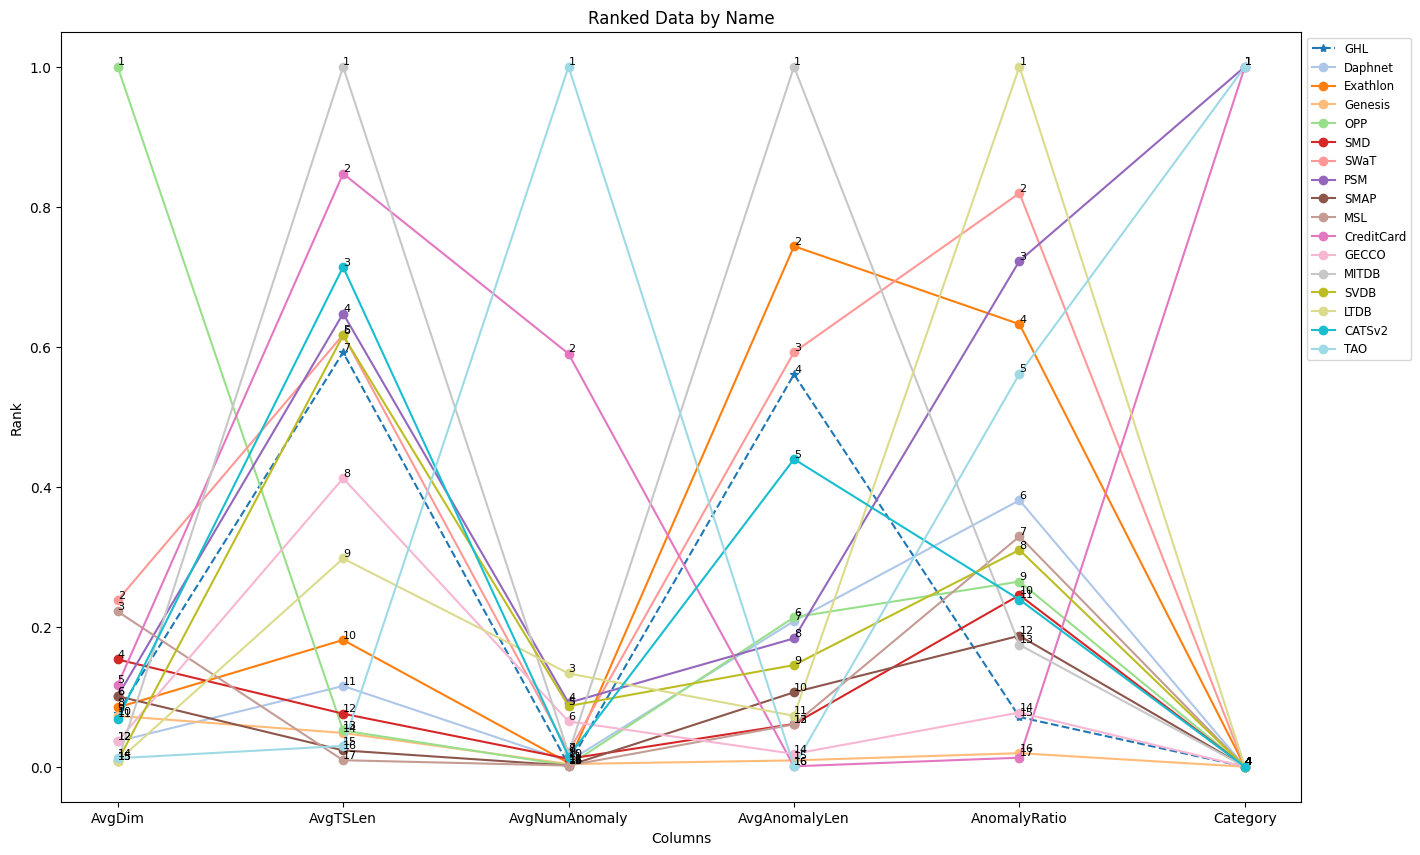

          Name  Curated    AvgDim  AvgTSLen AvgNumAnomaly AvgAnomalyLen AnomalyRatio Category
0          GHL       25   0.08(9)   0.59(7)      0.00(14)       0.56(4)     0.07(15)  0.00(4)
1      Daphnet        1  0.04(12)  0.12(11)      0.01(11)       0.21(7)      0.38(6)  0.00(4)
2     Exathlon       27   0.08(8)  0.18(10)      0.01(12)       0.74(2)      0.63(4)  0.00(4)
3      Genesis        1  0.07(10)  0.05(14)      0.00(13)      0.01(15)     0.02(16)  0.00(4)
4          OPP        8   1.00(1)  0.05(13)      0.00(15)       0.21(6)      0.26(9)  0.00(4)
5          SMD       22   0.15(4)  0.08(12)      0.01(10)      0.06(12)     0.25(10)  0.00(4)
6         SWaT        2   0.24(2)   0.62(5)       0.02(7)       0.59(3)      0.82(2)  0.00(4)
7          PSM        1   0.10(6)   0.65(4)       0.09(4)       0.18(8)      0.72(3)  1.00(1)
8         SMAP       27   0.10(6)  0.02(16)      0.00(16)      0.11(10)     0.19(12)  0.00(4)
9          MSL       16   0.22(3)  0.01(17)      0.00(16)   

In [96]:
combined_df = plot_data(df)
print(combined_df)